<a href="https://colab.research.google.com/github/hannahscholz/PatternFlowHS/blob/topic-recognition/recognition/46616780_YOLO_Hannah_Scholz/YOLOV5_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training YOLOv5 on the ISIC dataset
---

#### Hannah Scholz
#### s4661678

---

Data is loaded in to Google Drive after executing the dataset.py file.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Make sure located in files not in another folder
%ls

drive/  sample_data/


In [3]:
# Clone the YOLOV5 model:

!git clone https://github.com/ultralytics/yolov5 
%cd yolov5
%pip install -qr requirements.txt  

import torch
from yolov5 import utils
display = utils.notebook_init() 

YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (A100-SXM4-40GB, 40536MiB)


Setup complete ✅ (12 CPUs, 83.5 GB RAM, 38.8/78.2 GB disk)


In [4]:
%cd ..
%ls


/content
drive/  yolov5/


In [5]:
# Unzip the data
!unzip drive/MyDrive/ColabNotebooks/Archive.zip -d yolov5/data/

Streaming output truncated to the last 5000 lines.
  inflating: yolov5/data/__MACOSX/images/training/._ISIC_0000367.jpg  
  inflating: yolov5/data/images/training/ISIC_0004115.jpg  
  inflating: yolov5/data/__MACOSX/images/training/._ISIC_0004115.jpg  
  inflating: yolov5/data/images/training/ISIC_0012777.jpg  
  inflating: yolov5/data/__MACOSX/images/training/._ISIC_0012777.jpg  
  inflating: yolov5/data/images/training/ISIC_0000415.jpg  
  inflating: yolov5/data/__MACOSX/images/training/._ISIC_0000415.jpg  
  inflating: yolov5/data/images/training/ISIC_0010606.jpg  
  inflating: yolov5/data/__MACOSX/images/training/._ISIC_0010606.jpg  
  inflating: yolov5/data/images/training/ISIC_0014299.jpg  
  inflating: yolov5/data/__MACOSX/images/training/._ISIC_0014299.jpg  
  inflating: yolov5/data/images/training/ISIC_0000549.jpg  
  inflating: yolov5/data/__MACOSX/images/training/._ISIC_0000549.jpg  
  inflating: yolov5/data/images/training/ISIC_0011322.jpg  
  inflating: yolov5/data/__MACOS

In [6]:
# Create file for parameters for the model

f = open("dataset.yaml", "a")

f.write("train: ../data/images/training/\n")
f.write("test: ../data/images/testing/\n")
f.write("val: ../data/images/validation/\n")
f.write("nc: 2\n")
f.write("names: ['melanoma', 'healthy']\n")
f.close()

In [7]:
%ls

dataset.yaml  drive/  yolov5/


In [8]:
%cd yolov5

/content/yolov5


***Training of YOLOV5 - Small Model***

In [ ]:
# 4 Epochs 
!python train.py --img 640 --batch 16 --epochs 10 --data ../dataset.yaml --weights yolov5s.pt

In [ ]:
# 50 Epochs
!python train.py --img 640 --batch 16 --epochs 50 --data ../dataset.yaml --weights yolov5s.pt

In [ ]:
# Epochs = 200(recommended)
!python train.py --img 640 --batch 16 --epochs 200 --data ../dataset.yaml --weights yolov5s.pt

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=../dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weig

In [10]:
!nvidia-smi

Wed Oct 19 07:11:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   27C    P0    44W / 400W |      3MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
!python train.py --img 640 --batch 16 --epochs 300 --data ../dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=../dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (A100-SXM4-40GB, 40536MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, 

**Results using the Validation dataset for YOLOV5 - Small**

In [12]:
# Using the validation dataset
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source data/images/validation

detect: weights=['runs/train/exp/weights/best.pt'], source=data/images/validation, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (A100-SXM4-40GB, 40536MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/150 /content/yolov5/data/images/validation/ISIC_0001769.jpg: 640x640 1 melanoma, 9.2ms
image 2/150 /content/yolov5/data/images/validation/ISIC_0001852.jpg: 640x640 1 melanoma, 9.3ms
image 3/150 /content/yolov5/data/images/validation/ISIC_0001871.jpg: 640x640 1 melanoma, 9.2ms
image 4/150 /content/yolov5/data/images/validation/IS

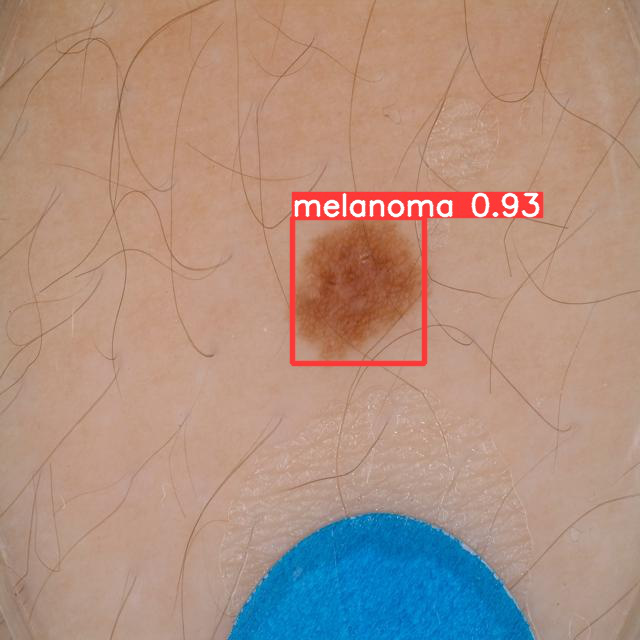

In [14]:
from IPython.display import display
from PIL import Image

image_path = "runs/detect/exp/ISIC_0001769.jpg"
display(Image.open(image_path))


**Training of YOLOV5 - Medium Model**

In [9]:
#4 Epochs
!python train.py --img 640 --batch 16 --epochs 4 --data ../dataset.yaml --weights yolov5m.pt

train: weights=yolov5m.pt, cfg=, data=../dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=4, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (A100-SXM4-40GB, 40536MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hs

In [10]:
#50 Epochs
!python train.py --img 640 --batch 16 --epochs 50 --data ../dataset.yaml --weights yolov5m.pt

train: weights=yolov5m.pt, cfg=, data=../dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (A100-SXM4-40GB, 40536MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, h

In [11]:
#100 Epochs
!python train.py --img 640 --batch 16 --epochs 100 --data ../dataset.yaml --weights yolov5m.pt

train: weights=yolov5m.pt, cfg=, data=../dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (A100-SXM4-40GB, 40536MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, 

In [15]:
#300 Epochs
!python train.py --img 640 --batch 16 --epochs 300 --data ../dataset.yaml --weights yolov5m.pt

train: weights=yolov5m.pt, cfg=, data=../dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (A100-SXM4-40GB, 40536MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, 

**Results using the Validation dataset for YOLOV5 - Medium**

In [21]:
!python detect.py --weights runs/train/exp3/weights/best.pt --img 640 --conf 0.4 --source data/images/validation

detect: weights=['runs/train/exp3/weights/best.pt'], source=data/images/validation, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (A100-SXM4-40GB, 40536MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
image 1/150 /content/yolov5/data/images/validation/ISIC_0001769.jpg: 640x640 1 melanoma, 12.6ms
image 2/150 /content/yolov5/data/images/validation/ISIC_0001852.jpg: 640x640 1 melanoma, 13.2ms
image 3/150 /content/yolov5/data/images/validation/ISIC_0001871.jpg: 640x640 1 melanoma, 13.1ms
image 4/150 /content/yolov5/data/images/validati

In [ ]:
from IPython.display import display
from PIL import Image

image_path = "runs/detect/exp5/ISIC_0001769.jpg"
display(Image.open(image_path))

In [20]:
# Validate YOLOv5s on validation
!python val.py --weights runs/train/exp3/weights/best.pt --data ../dataset.yaml --img 640 --half

val: data=../dataset.yaml, weights=['runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (A100-SXM4-40GB, 40536MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning '/content/yolov5/data/labels/validation.cache' images and labels... 150 found, 0 missing, 0 empty, 0 corrupt: 100% 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:02<00:00,  1.78it/s]
                   all        150        150      0.567      0.692      0.677      0.464
              melanoma        150        120      0.681      0.889      0.823      0.559
  

In [ ]:
# Detect 
# Determine IOU

!python detect.py --source 'data/images/validation' --data ../dataset.yaml --weights 'runs/train/exp3/weights/best.pt' --conf 0.4 --iou 0.45 --augment

In [ ]:
# Determine the xmin, ymin, xmax and ymax from the training label text files for input into bbox_iou


In [22]:
import math 
import torch

# Need to get IOU score 
# Can use the function from metrics.py which is below

def bbox_iou(box1, box2, xywh=True, GIoU=False, DIoU=False, CIoU=False, eps=1e-7):
    # Returns Intersection over Union (IoU) of box1(1,4) to box2(n,4)

    # Get the coordinates of bounding boxes
    if xywh:  # transform from xywh to xyxy
        (x1, y1, w1, h1), (x2, y2, w2, h2) = box1.chunk(4, 1), box2.chunk(4, 1)
        w1_, h1_, w2_, h2_ = w1 / 2, h1 / 2, w2 / 2, h2 / 2
        b1_x1, b1_x2, b1_y1, b1_y2 = x1 - w1_, x1 + w1_, y1 - h1_, y1 + h1_
        b2_x1, b2_x2, b2_y1, b2_y2 = x2 - w2_, x2 + w2_, y2 - h2_, y2 + h2_
    else:  # x1, y1, x2, y2 = box1
        b1_x1, b1_y1, b1_x2, b1_y2 = box1.chunk(4, 1)
        b2_x1, b2_y1, b2_x2, b2_y2 = box2.chunk(4, 1)
        w1, h1 = b1_x2 - b1_x1, b1_y2 - b1_y1
        w2, h2 = b2_x2 - b2_x1, b2_y2 - b2_y1

    # Intersection area
    inter = (torch.min(b1_x2, b2_x2) - torch.max(b1_x1, b2_x1)).clamp(0) * \
            (torch.min(b1_y2, b2_y2) - torch.max(b1_y1, b2_y1)).clamp(0)

    # Union Area
    union = w1 * h1 + w2 * h2 - inter + eps

    # IoU
    iou = inter / union
    if CIoU or DIoU or GIoU:
        cw = torch.max(b1_x2, b2_x2) - torch.min(b1_x1, b2_x1)  # convex (smallest enclosing box) width
        ch = torch.max(b1_y2, b2_y2) - torch.min(b1_y1, b2_y1)  # convex height
        if CIoU or DIoU:  # Distance or Complete IoU https://arxiv.org/abs/1911.08287v1
            c2 = cw ** 2 + ch ** 2 + eps  # convex diagonal squared
            rho2 = ((b2_x1 + b2_x2 - b1_x1 - b1_x2) ** 2 + (b2_y1 + b2_y2 - b1_y1 - b1_y2) ** 2) / 4  # center dist ** 2
            if CIoU:  # https://github.com/Zzh-tju/DIoU-SSD-pytorch/blob/master/utils/box/box_utils.py#L47
                v = (4 / math.pi ** 2) * torch.pow(torch.atan(w2 / (h2 + eps)) - torch.atan(w1 / (h1 + eps)), 2)
                with torch.no_grad():
                    alpha = v / (v - iou + (1 + eps))
                return iou - (rho2 / c2 + v * alpha)  # CIoU
            return iou - rho2 / c2  # DIoU
        c_area = cw * ch + eps  # convex area
        return iou - (c_area - union) / c_area  # GIoU https://arxiv.org/pdf/1902.09630.pdf
    return iou  # IoU


In [139]:
import numpy as np

def bbox_ioa(box1, box2, eps=1e-7):
    """ Returns the intersection over box2 area given box1, box2. Boxes are x1y1x2y2
    box1:       np.array of shape(4)
    box2:       np.array of shape(nx4)
    returns:    np.array of shape(n)
    """

    # Get the coordinates of bounding boxes
    b1_x1, b1_y1, b1_x2, b1_y2 = box1
    b2_x1, b2_y1, b2_x2, b2_y2 = box2.T

    # Intersection area
    inter_area = (np.minimum(b1_x2, b2_x2) - np.maximum(b1_x1, b2_x1)).clip(0) * \
                 (np.minimum(b1_y2, b2_y2) - np.maximum(b1_y1, b2_y1)).clip(0)

    # box2 area
    box2_area = (b2_x2 - b2_x1) * (b2_y2 - b2_y1) + eps

    # Intersection over box2 area
    return inter_area / box2_area



In [142]:
import torch
import os
from os import listdir
from PIL import Image as im
import csv

def IOU_calculator():
  # Model
  model = torch.hub.load('ultralytics/yolov5', 'custom', 'runs/train/exp3/weights/best.pt')  # yolov5n - yolov5x6 official model

  file_names = listdir("data/images/testing/")

  for filename in file_names:
      if filename.endswith(".DS_Store"):
          continue

      with im.open("data/images/testing/" + filename) as img:
        # Inference
        results = model(img)

        

        results.print()
        results.show()

        results.xywh[0]  # im predictions (tensor)
        prediction = results.pandas().xywh[0]  # im predictions (pandas)

        if prediction.empty: 
          continue

        print(prediction)
        print(prediction.loc[0]["xcenter"])
        print(prediction.loc[0]["ycenter"])
        print(prediction.loc[0]["width"])
        print(prediction.loc[0]["height"])

    
        xcenter = prediction.loc[0]["xcenter"]/640
        ycenter = prediction.loc[0]["ycenter"]/640
        width = prediction.loc[0]["width"]/640
        height = prediction.loc[0]["height"]/640

        print(xcenter)
        print(ycenter)
        print(width)
        print(height)

        box1 = np.array([xcenter, ycenter, width, height])

        print(filename)
        %ls

        label_file_name = filename.replace('.jpg', '.txt')
        print(label_file_name)

        values = open("data/labels/testing/" + label_file_name).read().split()
        xcenter2 = values[1]
        ycenter2 = values[2]
        width2 = values[3]
        height2 = values[4]

        print(xcenter2)
        print(ycenter2)
        print(width2)
        print(height2)

        box2 = np.array([xcenter2, ycenter2, width2, height2])


        iou = bbox_ioa(box1, box2)
        print(iou) 


        return


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (A100-SXM4-40GB, 40536MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 
image 1/1: 640x640 (no detections)
Speed: 8.1ms pre-process, 15.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


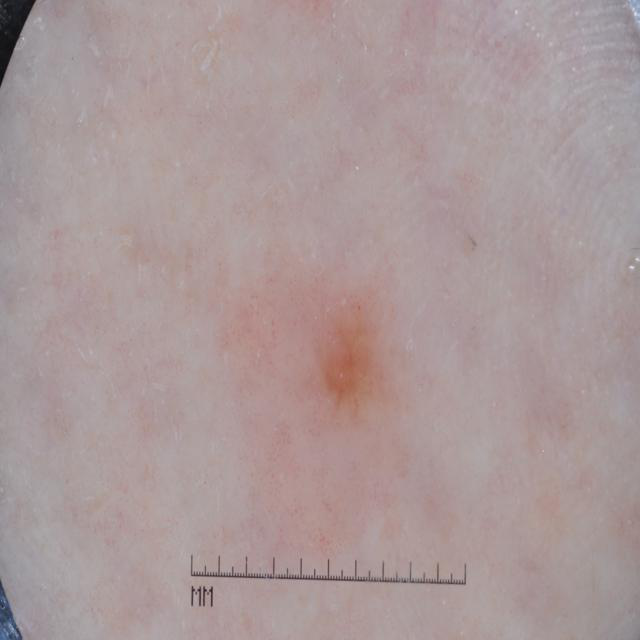

image 1/1: 640x640 (no detections)
Speed: 8.2ms pre-process, 14.4ms inference, 0.5ms NMS per image at shape (1, 3, 640, 640)


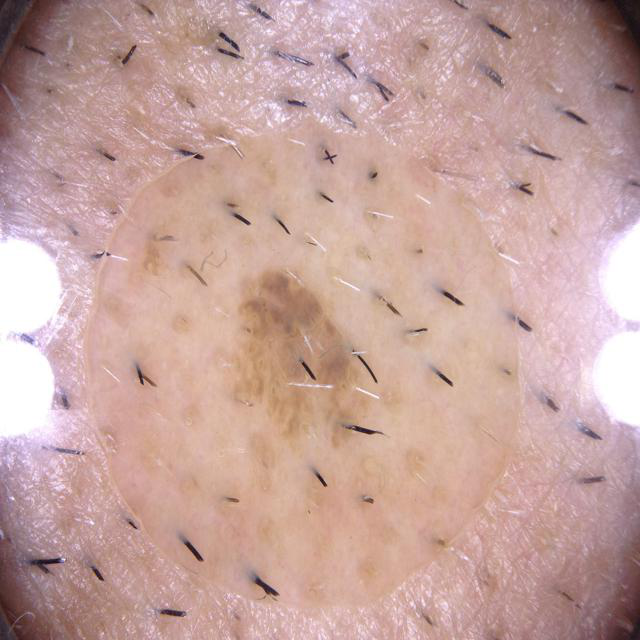

image 1/1: 640x640 1 melanoma
Speed: 8.2ms pre-process, 14.4ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)


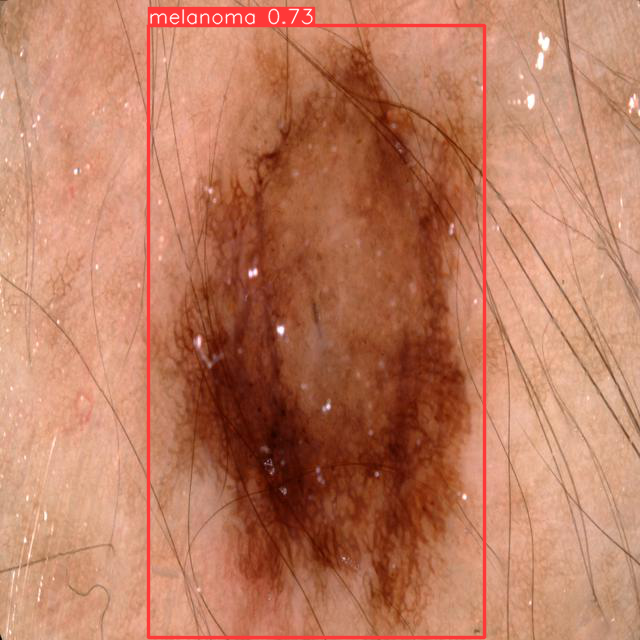

      xcenter     ycenter       width      height  confidence  class      name
0  316.503204  331.597412  335.616577  612.716064    0.733569      0  melanoma
316.5032043457031
331.597412109375
335.6165771484375
612.716064453125
0.4945362567901611
0.5181209564208984
0.5244009017944335
0.9573688507080078
ISIC_0015244.jpg
benchmarks.py    export.py     README.md         train.py        yolov5s.pt
classify/        hubconf.py    requirements.txt  tutorial.ipynb
CONTRIBUTING.md  LICENSE       runs/             utils/
data/            models/       segment/          val.py
detect.py        __pycache__/  setup.cfg         yolov5m.pt
ISIC_0015244.txt
0.50390625
0.51015625
0.5484375
0.9765625


UFuncTypeError: ignored

In [143]:
IOU_calculator()